In [1]:
import pathlib
import dataclasses

import numpy as np

import matplotlib.pyplot as plt

from anguilla.optimizers import MOCMA
from anguilla.optimizers.mocma import MOCMA as MOCMAPython
from anguilla.evaluation import MOCMATrialParameters
from anguilla.fitness import benchmark

In [2]:
def plot_3d(fitness, pareto_front=None, title=None):
    fig = plt.figure(figsize=(18, 4.5))
    ax0 = fig.add_subplot(111, projection='3d')
    ax1 = fig.add_subplot(121, projection='3d')
    ax0.scatter(fitness[:, 0], fitness[:, 1], fitness[:, 2], marker="x", color="green", label="Approximation")
    ax1.scatter(fitness[:, 0], fitness[:, 1], fitness[:, 2], marker="x", color="green", label="Approximation")
    if pareto_front is not None:
        ax0.scatter(pareto_front[:, 0], pareto_front[:, 1], pareto_front[:, 2], marker="o", color="red", label="True", alpha=0.2)
    ax0.legend()
    ax1.legend()
    if title is not None:
        fig.suptitle(title)
    fig.tight_layout()
    return fig

def run_and_plot(parameters: MOCMATrialParameters, pareto_front=None, implementation="cxx"):
    if parameters.seed is not None:
        rng = np.random.default_rng(parameters.seed)
    else:
        rng = np.random.default_rng()

    fn = parameters.fn_cls(*parameters.fn_args, rng=rng, **parameters.fn_kwargs)
    parent_points = fn.random_points(parameters.n_parents)
    parent_fitness = fn(parent_points)
    if implementation == "cxx":
        optimizer = MOCMA(parent_points, parent_fitness,
                          success_notion=parameters.success_notion,
                          n_offspring=parameters.n_offspring,
                          max_evaluations=parameters.max_evaluations, seed=rng.integers(0, 1000000))
    else:
        optimizer = MOCMAPython(parent_points, parent_fitness,
                          success_notion=parameters.success_notion,
                          n_offspring=parameters.n_offspring,
                          max_evaluations=parameters.max_evaluations, rng=rng)
    while not optimizer.stop.triggered:
        points = optimizer.ask()
        if fn.has_constraints:
            optimizer.tell(*fn.evaluate_with_penalty(points))
        else:
            optimizer.tell(fn(points))
    title = "{} with {}: ${} \mapsto {}$\n{} evaluations".format(optimizer.qualified_name,
                                                                 fn.qualified_name,
                                                                 fn.n_dimensions,
                                                                 fn.n_objectives,
                                                                 optimizer.evaluation_count,
                                                                )
    fig = plot_3d(optimizer.best.fitness, pareto_front=pareto_front, title=title)

In [3]:
parameters = MOCMATrialParameters(None, fn_args=(30, 3), initial_step_size=0.6, max_evaluations=50000, n_parents=100)

## DTLZ1

In [4]:
pareto_front = np.loadtxt("http://www.cs.cinvestav.mx/~emoobook/apendix-e/data/paretoDTLZ1.dat")

### Population-based

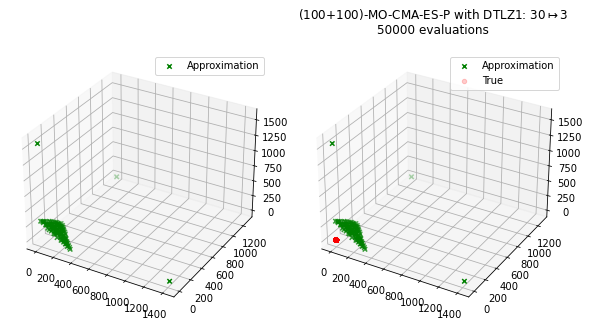

In [5]:
fig = run_and_plot(dataclasses.replace(parameters, fn_cls=benchmark.DTLZ1), pareto_front)

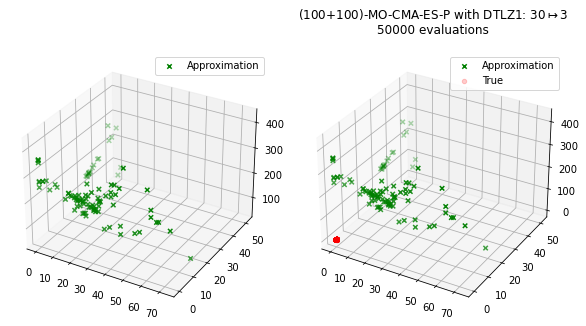

In [6]:
fig = run_and_plot(dataclasses.replace(parameters, fn_cls=benchmark.DTLZ1), pareto_front, implementation="python")

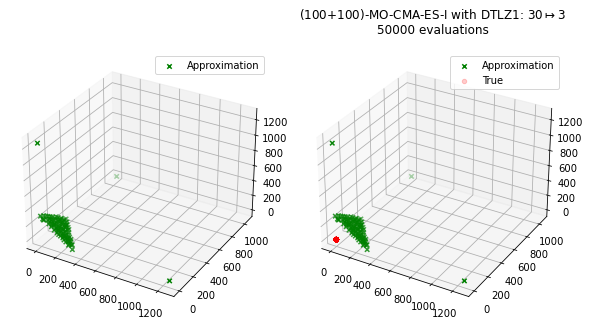

In [7]:
fig = run_and_plot(dataclasses.replace(parameters, fn_cls=benchmark.DTLZ1, success_notion="individual"), pareto_front)

### Population-based, steady-state

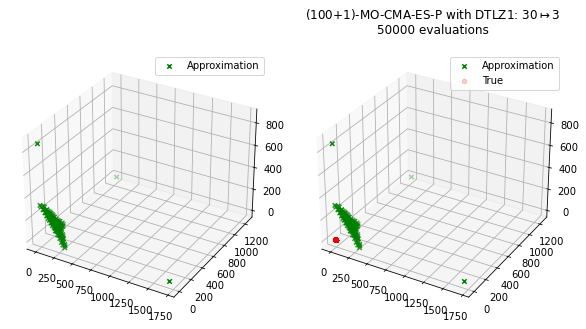

In [8]:
fig = run_and_plot(dataclasses.replace(parameters, fn_cls=benchmark.DTLZ1, n_offspring=1), pareto_front)

### Individual-based, steady-state

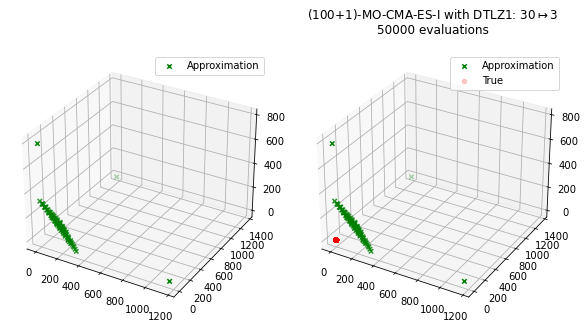

In [9]:
fig = run_and_plot(dataclasses.replace(parameters, fn_cls=benchmark.DTLZ1, success_notion="individual", n_offspring=1), pareto_front)

## DTLZ2

In [15]:
pareto_front = np.loadtxt("http://www.cs.cinvestav.mx/~emoobook/apendix-e/data/paretoDTLZ2.dat")

### Population-based

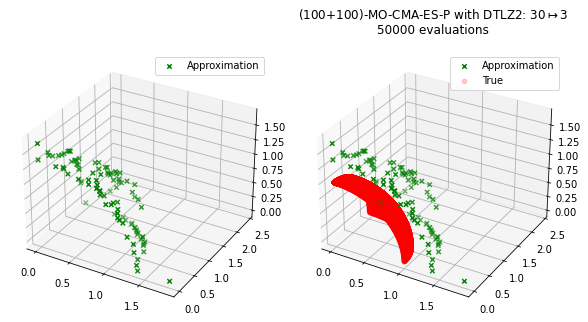

In [16]:
fig = run_and_plot(dataclasses.replace(parameters, fn_cls=benchmark.DTLZ2), pareto_front)

### Individual-based

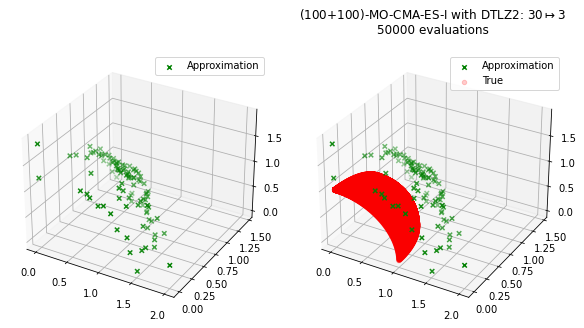

In [17]:
fig = run_and_plot(dataclasses.replace(parameters, fn_cls=benchmark.DTLZ2, success_notion="individual"), pareto_front)

### Population-based, steady-state

In [ ]:
fig = run_and_plot(dataclasses.replace(parameters, fn_cls=benchmark.DTLZ2, n_offspring=1), pareto_front)

### Individual-based, steady-state

In [ ]:
fig = run_and_plot(dataclasses.replace(parameters, fn_cls=benchmark.DTLZ2, success_notion="individual", n_offspring=1), pareto_front)

## DTLZ3

In [18]:
pareto_front = np.loadtxt("http://www.cs.cinvestav.mx/~emoobook/apendix-e/data/paretoDTLZ3.dat")

### Population-based

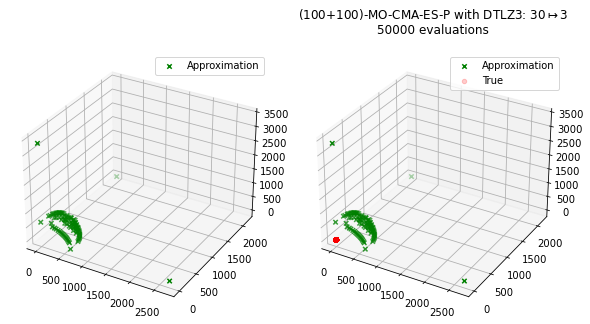

In [19]:
fig = run_and_plot(dataclasses.replace(parameters, fn_cls=benchmark.DTLZ3), pareto_front)

### Individual-based

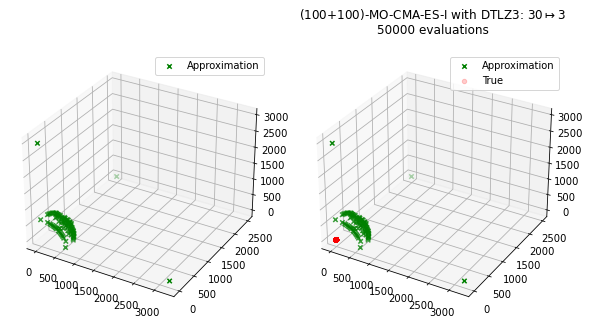

In [20]:
fig = run_and_plot(dataclasses.replace(parameters, fn_cls=benchmark.DTLZ3, success_notion="individual"), pareto_front)

### Population-based, steady-state

In [ ]:
fig = run_and_plot(dataclasses.replace(parameters, fn_cls=benchmark.DTLZ3, n_offspring=1), pareto_front)

### Individual-based, steady-state

In [ ]:
fig = run_and_plot(dataclasses.replace(parameters, fn_cls=benchmark.DTLZ3, success_notion="individual", n_offspring=1), pareto_front)

## DTLZ4

In [21]:
pareto_front = np.loadtxt("http://www.cs.cinvestav.mx/~emoobook/apendix-e/data/paretoDTLZ4.dat")

### Population-based

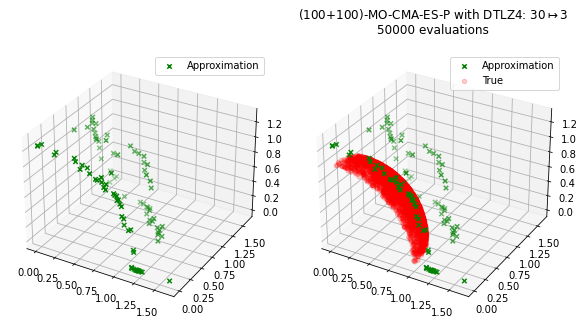

In [22]:
fig = run_and_plot(dataclasses.replace(parameters, fn_cls=benchmark.DTLZ4), pareto_front)

### Individual-based

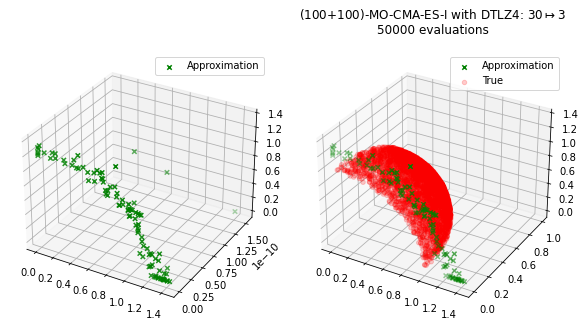

In [23]:
fig = run_and_plot(dataclasses.replace(parameters, fn_cls=benchmark.DTLZ4, success_notion="individual"), pareto_front)

### Population-based, steady-state

In [ ]:
fig = run_and_plot(dataclasses.replace(parameters, fn_cls=benchmark.DTLZ4, n_offspring=1), pareto_front)

### Individual-based, steady-state

In [ ]:
fig = run_and_plot(dataclasses.replace(parameters, fn_cls=benchmark.DTLZ4, success_notion="individual", n_offspring=1), pareto_front)

## DTLZ5

In [24]:
pareto_front = np.loadtxt("http://www.cs.cinvestav.mx/~emoobook/apendix-e/data/paretoDTLZ5.dat")

### Population-based

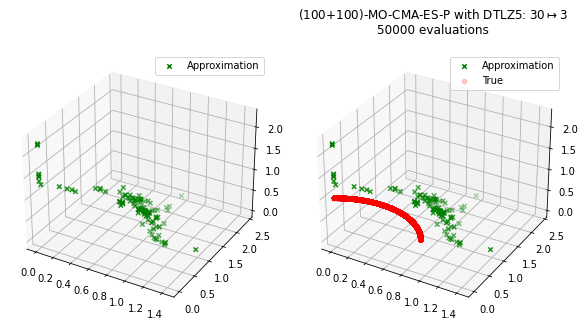

In [25]:
fig = run_and_plot(dataclasses.replace(parameters, fn_cls=benchmark.DTLZ5), pareto_front)

### Individual-based

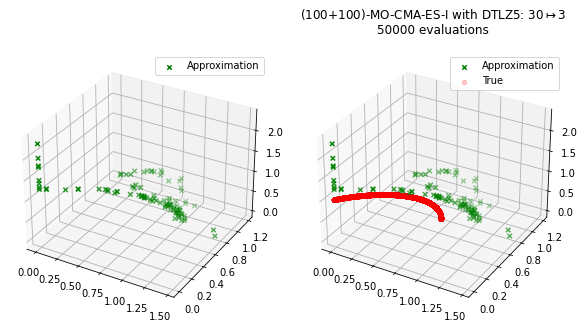

In [26]:
fig = run_and_plot(dataclasses.replace(parameters, fn_cls=benchmark.DTLZ5, success_notion="individual"), pareto_front)

### Population-based, steady-state

In [ ]:
fig = run_and_plot(dataclasses.replace(parameters, fn_cls=benchmark.DTLZ5, n_offspring=1), pareto_front)

### Individual-based, steady-state

In [ ]:
fig = run_and_plot(dataclasses.replace(parameters, fn_cls=benchmark.DTLZ5, success_notion="individual", n_offspring=1), pareto_front)

## DTLZ6

In [27]:
pareto_front = np.loadtxt("http://www.cs.cinvestav.mx/~emoobook/apendix-e/data/paretoDTLZ6.dat")

### Population-based

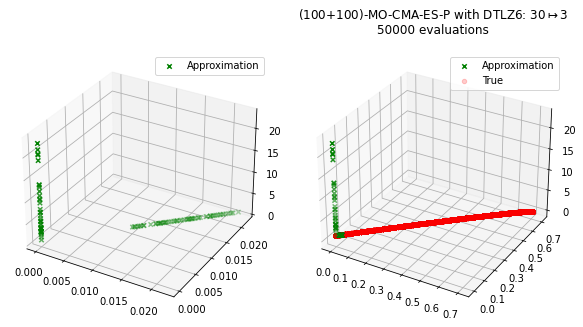

In [28]:
fig = run_and_plot(dataclasses.replace(parameters, fn_cls=benchmark.DTLZ6), pareto_front)

### Individual-based

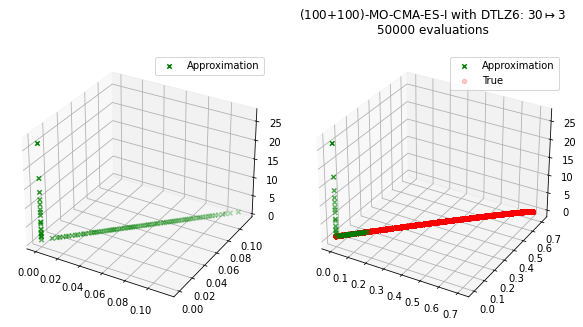

In [29]:
fig = run_and_plot(dataclasses.replace(parameters, fn_cls=benchmark.DTLZ6, success_notion="individual"), pareto_front)

### Population-based, steady-state

In [ ]:
fig = run_and_plot(dataclasses.replace(parameters, fn_cls=benchmark.DTLZ6, n_offspring=1), pareto_front)

### Individual-based, steady-state

In [ ]:
fig = run_and_plot(dataclasses.replace(parameters, fn_cls=benchmark.DTLZ6, success_notion="individual", n_offspring=1), pareto_front)

## DTLZ7

In [10]:
pareto_front = np.loadtxt("http://www.cs.cinvestav.mx/~emoobook/apendix-e/data/paretoDTLZ7.dat")

### Population-based

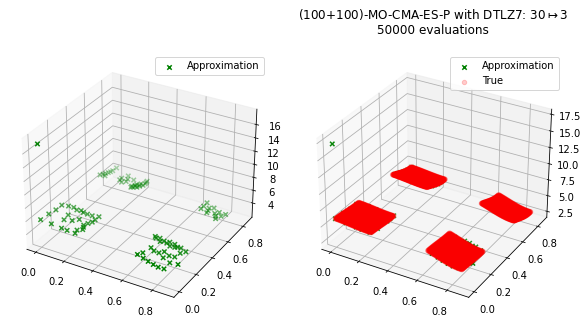

In [11]:
fig = run_and_plot(dataclasses.replace(parameters, fn_cls=benchmark.DTLZ7), pareto_front)

### Individual-based

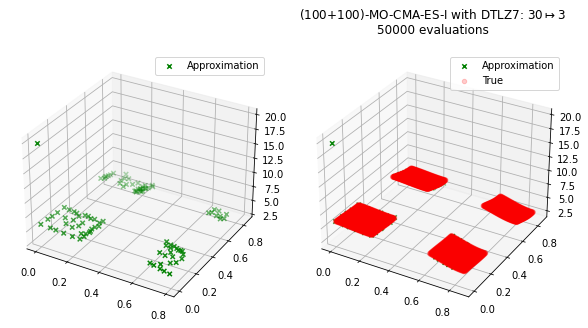

In [12]:
fig = run_and_plot(dataclasses.replace(parameters, fn_cls=benchmark.DTLZ7, success_notion="individual"), pareto_front)

### Population-based, steady-state

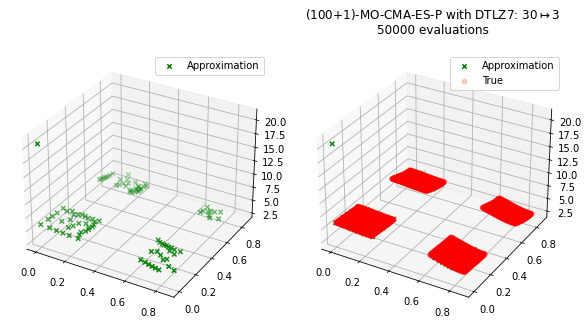

In [13]:
fig = run_and_plot(dataclasses.replace(parameters, fn_cls=benchmark.DTLZ7, n_offspring=1), pareto_front)

### Individual-based, steady-state

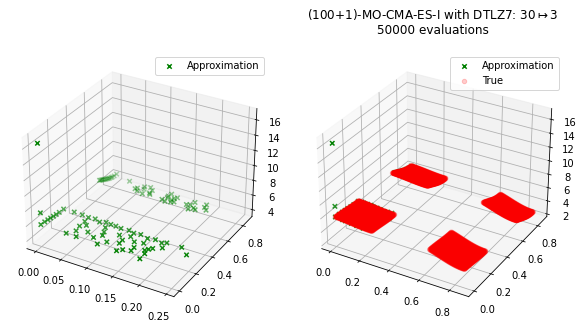

In [14]:
fig = run_and_plot(dataclasses.replace(parameters, fn_cls=benchmark.DTLZ7, success_notion="individual", n_offspring=1), pareto_front)